In [1]:
import ecg_utility
from ecg_utility import utils, neural, snapshot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.io import loadmat
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score

In [3]:
mat_files = sorted(glob.glob('CPSC_extra/*.mat'))
hea_files = sorted(glob.glob('CPSC_extra/*.hea'))

In [4]:
len(mat_files)

3453

In [5]:
mappings_scored = pd.read_csv('CPSC_extra/SNOMED_mappings_scored.csv',sep=';')
mappings_scored.head()

,Dx,SNOMED CT Code,Abbreviation,CPSC,CPSC-Extra,StPetersburg,PTB,PTB-XL,Georgia,Total,Notes
0,1st degree av block,270492004,IAVB,722,106,0,0,797,769,2394,NaN
1,atrial fibrillation,164889003,AF,1221,153,2,15,1514,570,3475,NaN
2,atrial flutter,164890007,AFL,0,54,0,1,73,186,314,NaN
3,bradycardia,426627000,Brady,0,271,11,0,0,6,288,NaN
4,complete right bundle branch block,713427006,CRBBB,0,113,0,0,542,28,683,We score 713427006 and 59118001 as the same di...


In [6]:
sig = loadmat(mat_files[0])['val']
sig

array([[  0,   0,   0, ..., -13,  -8, -10],
       [ 10,  12,  11, ...,  -1,   4,   7],
       [ 10,  13,  12, ...,  12,  12,  18],
       ...,
       [ 75, 103,  89, ..., 107, 104, 121],
       [ 16,  18,  13, ...,   2,   6,   8],
       [  9,   9,   4, ...,   3,   2,   3]], dtype=int16)

In [7]:
df = utils.get_df()
df

,filename,age,gender,diagnosis,ecg_signal,Lead I,Lead II,Lead III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6


In [8]:
for mat, hea in zip(mat_files, hea_files):
    read = utils.Read(hea, mat)
    df = read.insert_info(df)

In [9]:
df

,filename,age,gender,diagnosis,ecg_signal,Lead I,Lead II,Lead III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,CPSC_extra\Q0001.mat,53,M,"[164867002, 427084000]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.93620328721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.936203287212...","[0.0005936203287212333, 0.006037652244061175, ...","[0.0005936203287212333, 0.006097014276933299, ...","[-0.00029681016436061664, -0.00307818815490271...","[-0.00029681016436061664, -0.00307818815490271...","[0.0006529823615933566, 0.006629545061892868, ...","[0.003086825709350413, 0.03202502921756262, 0....","[0.0026119294463734263, 0.027052438543420584, ...","[0.0010091545588260965, 0.010240264001755145, ...","[0.004452152465409249, 0.04605409825779641, 0....","[0.0009497925259539732, 0.009589009151051332, ...","[0.00053425829584911, 0.005327035360485236, 0...."
1,CPSC_extra\Q0002.mat,70,F,[164861001],"[[0.0011278786245703433, 0.011542773703162784,...","[0.0011278786245703433, 0.011542773703162784, ...","[0.027603345285537352, 0.27422100573291114, 1....","[0.026475466660967006, 0.26267823202974827, 1....","[-0.014306249922181722, -0.14228999690020525, ...","[-0.012644113001762268, -0.12524210173794084, ...","[0.02700972495681611, 0.26818335348884986, 1.3...","[0.0026712914792455496, 0.02693198696678679, 0...","[0.0007717064273376033, 0.00811014086191687, 0...","[0.0013653267560588367, 0.013850982941617431, ...","[0.0035023599394552766, 0.03539657251504687, 0...","[-0.019767556946417065, -0.1963879639434882, -...","[-0.009023028996562746, -0.08854301952148638, ..."
2,CPSC_extra\Q0003.mat,55,M,"[164867002, 428750005]","[[-0.0027900155449897966, -0.02781896243808956...","[-0.0027900155449897966, -0.027818962438089567...","[0.00035617219723273994, 0.003551356906990157,...","[0.0031461877422225364, 0.03137031934507972, 0...","[0.0012466026903145896, 0.012429749174465547, ...","[-0.002968101643606166, -0.029594640891584638,...","[0.0017808609861636997, 0.01775678453495079, 0...","[-0.0008310684602097266, -0.008405223515387946...","[-0.0018995850519079463, -0.01888120813774205,...","[-0.0006529823615933566, -0.006570183029020745...","[-0.00035617219723273994, -0.00355135690699015...","[0.0006529823615933566, 0.006451458963276498, ...","[0.00029681016436061664, 0.0029594640891584642..."
3,CPSC_extra\Q0004.mat,57,M,"[164861001, 428750005]","[[-0.0004748962629769866, -0.00485386660839779...","[-0.0004748962629769866, -0.00485386660839779,...","[-0.0009497925259539732, -0.009589009151051332...","[-0.0004748962629769866, -0.004735142542653543...","[0.0007123443944654799, 0.0071620758468524375,...","[5.936203287212332e-05, 0.0005325307849595696,...","[-0.0007123443944654799, -0.007221437879724561...","[-0.001484050821803083, -0.0155096648402578, -...","[-0.00195894708478007, -0.020422893481527715, ...","[-0.0007717064273376033, -0.007991416796172624...","[-0.0013059647231867132, -0.01349653825527423,...","[-0.00106851659169822, -0.011307053082563828, ...","[-0.00106851659169822, -0.011010242918203211, ..."
4,CPSC_extra\Q0005.mat,51,F,[428750005],"[[0.0005936203287212333, 0.005978290211189051,...","[0.0005936203287212333, 0.005978290211189051, ...","[0.0012466026903145896, 0.013142093568931028, ...","[0.0007123443944654799, 0.007696334142701548, ...","[-0.0008904304930818499, -0.009293926497580257...","[-0.00011872406574424665, -0.00142123376715187...","[0.0009497925259539732, 0.010123267446900444, ...","[0.0055206690571074695, 0.057657961504720856, ...","[0.0017808609861636997, 0.018884663159521132, ...","[0.004333428399665003, 0.04546393295085426, 0....","[0.002968101643606166, 0.03125677781200409, 0....","[0.005223858892746853, 0.054639135382690274, 0...","[0.0026119294463734263, 0.027289886674909076, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,CPSC_extra\Q3577.mat,61,M,"[54329005, 428750005]","[[0.0018995850519079463, 0.018465673907637183,...","[0.0018995850519079463, 0.018465673907637183, ...","[-0.0022557572491406865, -0.02296682334058132,...","[

In [10]:
copy_df = df
copy_df

,filename,age,gender,diagnosis,ecg_signal,Lead I,Lead II,Lead III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,CPSC_extra\Q0001.mat,53,M,"[164867002, 427084000]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.93620328721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.936203287212...","[0.0005936203287212333, 0.006037652244061175, ...","[0.0005936203287212333, 0.006097014276933299, ...","[-0.00029681016436061664, -0.00307818815490271...","[-0.00029681016436061664, -0.00307818815490271...","[0.0006529823615933566, 0.006629545061892868, ...","[0.003086825709350413, 0.03202502921756262, 0....","[0.0026119294463734263, 0.027052438543420584, ...","[0.0010091545588260965, 0.010240264001755145, ...","[0.004452152465409249, 0.04605409825779641, 0....","[0.0009497925259539732, 0.009589009151051332, ...","[0.00053425829584911, 0.005327035360485236, 0...."
1,CPSC_extra\Q0002.mat,70,F,[164861001],"[[0.0011278786245703433, 0.011542773703162784,...","[0.0011278786245703433, 0.011542773703162784, ...","[0.027603345285537352, 0.27422100573291114, 1....","[0.026475466660967006, 0.26267823202974827, 1....","[-0.014306249922181722, -0.14228999690020525, ...","[-0.012644113001762268, -0.12524210173794084, ...","[0.02700972495681611, 0.26818335348884986, 1.3...","[0.0026712914792455496, 0.02693198696678679, 0...","[0.0007717064273376033, 0.00811014086191687, 0...","[0.0013653267560588367, 0.013850982941617431, ...","[0.0035023599394552766, 0.03539657251504687, 0...","[-0.019767556946417065, -0.1963879639434882, -...","[-0.009023028996562746, -0.08854301952148638, ..."
2,CPSC_extra\Q0003.mat,55,M,"[164867002, 428750005]","[[-0.0027900155449897966, -0.02781896243808956...","[-0.0027900155449897966, -0.027818962438089567...","[0.00035617219723273994, 0.003551356906990157,...","[0.0031461877422225364, 0.03137031934507972, 0...","[0.0012466026903145896, 0.012429749174465547, ...","[-0.002968101643606166, -0.029594640891584638,...","[0.0017808609861636997, 0.01775678453495079, 0...","[-0.0008310684602097266, -0.008405223515387946...","[-0.0018995850519079463, -0.01888120813774205,...","[-0.0006529823615933566, -0.006570183029020745...","[-0.00035617219723273994, -0.00355135690699015...","[0.0006529823615933566, 0.006451458963276498, ...","[0.00029681016436061664, 0.0029594640891584642..."
3,CPSC_extra\Q0004.mat,57,M,"[164861001, 428750005]","[[-0.0004748962629769866, -0.00485386660839779...","[-0.0004748962629769866, -0.00485386660839779,...","[-0.0009497925259539732, -0.009589009151051332...","[-0.0004748962629769866, -0.004735142542653543...","[0.0007123443944654799, 0.0071620758468524375,...","[5.936203287212332e-05, 0.0005325307849595696,...","[-0.0007123443944654799, -0.007221437879724561...","[-0.001484050821803083, -0.0155096648402578, -...","[-0.00195894708478007, -0.020422893481527715, ...","[-0.0007717064273376033, -0.007991416796172624...","[-0.0013059647231867132, -0.01349653825527423,...","[-0.00106851659169822, -0.011307053082563828, ...","[-0.00106851659169822, -0.011010242918203211, ..."
4,CPSC_extra\Q0005.mat,51,F,[428750005],"[[0.0005936203287212333, 0.005978290211189051,...","[0.0005936203287212333, 0.005978290211189051, ...","[0.0012466026903145896, 0.013142093568931028, ...","[0.0007123443944654799, 0.007696334142701548, ...","[-0.0008904304930818499, -0.009293926497580257...","[-0.00011872406574424665, -0.00142123376715187...","[0.0009497925259539732, 0.010123267446900444, ...","[0.0055206690571074695, 0.057657961504720856, ...","[0.0017808609861636997, 0.018884663159521132, ...","[0.004333428399665003, 0.04546393295085426, 0....","[0.002968101643606166, 0.03125677781200409, 0....","[0.005223858892746853, 0.054639135382690274, 0...","[0.0026119294463734263, 0.027289886674909076, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,CPSC_extra\Q3577.mat,61,M,"[54329005, 428750005]","[[0.0018995850519079463, 0.018465673907637183,...","[0.0018995850519079463, 0.018465673907637183, ...","[-0.0022557572491406865, -0.02296682334058132,...","[

In [11]:
enc = utils.Encoder(copy_df,mappings_scored)

In [12]:
xdf = enc.organize()
xdf.head()

The classes we will look at are encoded as SNOMED CT codes:
['10370003' '111288001' '11157007' '111975006' '164861001' '164865005'
 '164867002' '164873001' '164889003' '164890007' '164895002' '164896001'
 '164909002' '164917005' '164921003' '164930006' '164931005' '164934002'
 '164937009' '17338001' '195042002' '195060002' '195080001' '195126007'
 '233917008' '251120003' '251164006' '251170000' '251180001' '251259000'
 '266249003' '270492004' '27885002' '284470004' '29320008' '370365005'
 '413444003' '413844008' '426177001' '426627000' '426648003' '426749004'
 '426761007' '426783006' '426995002' '427084000' '427172004' '427393009'
 '428750005' '429622005' '446358003' '446813000' '47665007' '49578007'
 '54329005' '55930002' '59118001' '59931005' '63593006' '65778007'
 '67741000119109' '698252002' '704997005' '713422000' '713426002'
 '713427006' '74615001' '75532003' '77867006' '81898007' '82226007'
 '89792004']
classes: 71


,filename,age,gender,ecg_signal,Lead I,Lead II,Lead III,aVR,aVL,aVF,...,427084000,427172004,427393009,47665007,59118001,59931005,63593006,698252002,713426002,713427006
0,CPSC_extra\Q0001.mat,53,M,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.93620328721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.936203287212...","[0.0005936203287212333, 0.006037652244061175, ...","[0.0005936203287212333, 0.006097014276933299, ...","[-0.00029681016436061664, -0.00307818815490271...","[-0.00029681016436061664, -0.00307818815490271...","[0.0006529823615933566, 0.006629545061892868, ...",...,1,0,0,0,0,0,0,0,0,0
7,CPSC_extra\Q0010.mat,72,M,"[[0.002374481314884933, 0.023794436779011958, ...","[0.002374481314884933, 0.023794436779011958, 0...","[0.00029681016436061664, 0.0028407400234142176...","[-0.0020776711505243167, -0.020953696755597745...","[-0.0013059647231867132, -0.013021641992297241...","[0.0021963952162685632, 0.022078120358389002, ...","[-0.0008904304930818499, -0.009056478366091763...",...,0,1,0,0,0,0,0,0,0,0
9,CPSC_extra\Q0012.mat,79,F,"[[0.0011278786245703433, 0.011542773703162784,...","[0.0011278786245703433, 0.011542773703162784, ...","[0.00011872406574424665, 0.0010056995370470159...","[-0.0009497925259539732, -0.010004543381156195...","[-0.0005936203287212333, -0.006037652244061175...","[0.00106851659169822, 0.011069604951075333, 0....","[-0.00035617219723273994, -0.00402625316996714...",...,0,0,0,0,0,0,0,0,0,0
10,CPSC_extra\Q0013.mat,67,M,"[[0.0011872406574424666, 0.011600408225145364,...","[0.0011872406574424666, 0.011600408225145364, ...","[-0.0008310684602097266, -0.008286499449643698...","[-0.002018309117652193, -0.019886907674789057,...","[-0.00011872406574424665, -0.00112442360279126...","[0.0016027748875473299, 0.015684295917095095, ...","[-0.0013653267560588367, -0.01349481074438469,...",...,0,1,0,0,0,0,0,0,0,0
14,CPSC_extra\Q0017.mat,65,F,"[[-0.00053425829584911, -0.006276827886439209,...","[-0.00053425829584911, -0.006276827886439209, ...","[-0.0007123443944654799, -0.008705488701527646...","[-0.00017808609861636997, -0.00242866081508843...","[0.0005936203287212333, 0.007284254934375765, ...","[-0.00017808609861636997, -0.00195376455211144...","[-0.0004748962629769866, -0.005803659134351762...",...,0,0,0,0,0,0,1,0,0,0


In [13]:
xdf

,filename,age,gender,ecg_signal,Lead I,Lead II,Lead III,aVR,aVL,aVF,...,427084000,427172004,427393009,47665007,59118001,59931005,63593006,698252002,713426002,713427006
0,CPSC_extra\Q0001.mat,53,M,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.93620328721...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.936203287212...","[0.0005936203287212333, 0.006037652244061175, ...","[0.0005936203287212333, 0.006097014276933299, ...","[-0.00029681016436061664, -0.00307818815490271...","[-0.00029681016436061664, -0.00307818815490271...","[0.0006529823615933566, 0.006629545061892868, ...",...,1,0,0,0,0,0,0,0,0,0
7,CPSC_extra\Q0010.mat,72,M,"[[0.002374481314884933, 0.023794436779011958, ...","[0.002374481314884933, 0.023794436779011958, 0...","[0.00029681016436061664, 0.0028407400234142176...","[-0.0020776711505243167, -0.020953696755597745...","[-0.0013059647231867132, -0.013021641992297241...","[0.0021963952162685632, 0.022078120358389002, ...","[-0.0008904304930818499, -0.009056478366091763...",...,0,1,0,0,0,0,0,0,0,0
9,CPSC_extra\Q0012.mat,79,F,"[[0.0011278786245703433, 0.011542773703162784,...","[0.0011278786245703433, 0.011542773703162784, ...","[0.00011872406574424665, 0.0010056995370470159...","[-0.0009497925259539732, -0.010004543381156195...","[-0.0005936203287212333, -0.006037652244061175...","[0.00106851659169822, 0.011069604951075333, 0....","[-0.00035617219723273994, -0.00402625316996714...",...,0,0,0,0,0,0,0,0,0,0
10,CPSC_extra\Q0013.mat,67,M,"[[0.0011872406574424666, 0.011600408225145364,...","[0.0011872406574424666, 0.011600408225145364, ...","[-0.0008310684602097266, -0.008286499449643698...","[-0.002018309117652193, -0.019886907674789057,...","[-0.00011872406574424665, -0.00112442360279126...","[0.0016027748875473299, 0.015684295917095095, ...","[-0.0013653267560588367, -0.01349481074438469,...",...,0,1,0,0,0,0,0,0,0,0
14,CPSC_extra\Q0017.mat,65,F,"[[-0.00053425829584911, -0.006276827886439209,...","[-0.00053425829584911, -0.006276827886439209, ...","[-0.0007123443944654799, -0.008705488701527646...","[-0.00017808609861636997, -0.00242866081508843...","[0.0005936203287212333, 0.007284254934375765, ...","[-0.00017808609861636997, -0.00195376455211144...","[-0.0004748962629769866, -0.005803659134351762...",...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,CPSC_extra\Q3568.mat,69,M,"[[-0.008844942897946375, -0.08807330579117797,...","[-0.008844942897946375, -0.08807330579117797, ...","[-0.00783578833912028, -0.0780111278880392, -0...","[0.0010091545588260965, 0.010062177903138776, ...","[0.008310684602097267, 0.08274627043069277, 0....","[-0.004927048728386236, -0.049008379814286254,...","[-0.0033836358737110296, -0.033619166550662244...",...,1,0,0,0,0,0,0,0,0,0
3441,CPSC_extra\Q3570.mat,75,M,"[[0.04155342301048633, 0.41533412704101114, 2....","[0.04155342301048633, 0.41533412704101114, 2.0...","[0.06084608369392641, 0.6038407606996232, 2.96...","[0.019292660683440082, 0.18850663365861214, 0....","[-0.051170072335770304, -0.5093211784778373, -...","[0.011100700147087063, 0.11311780028228363, 0....","[0.04006937218868325, 0.39614401616268163, 1.9...",...,0,0,0,0,0,0,0,0,0,0
3443,CPSC_extra\Q3572.mat,66,M,"[[0.011516234377191925, 0.12046659978220013, 0...","[0.011516234377191925, 0.12046659978220013, 0....","[-0.0022557572491406865, -0.022848099274837073...","[-0.013771991626332612, -0.1433146990570372, -...","[-0.00463023856402562, -0.0488389312701176, -0...","[0.012644113001762268, 0.13195001145249077, 0....","[-0.008013874437736648, -0.08311108018237318, ...",...,0,0,0,0,0,0,0,0,0,0
3444,CPSC_extra\Q3573.mat,84,M,"[[-0.00029681016436061664, -0.0029001020562863...","[-0.00029681016436061664, -0.00290010205628634...","[-0.0013653267560588367, -0.013732258875873185...","[-0.00106851659169822, -0.01077279478671472, -...","[0.0008310684602097266, 0.008345861482515822, ...","[0.00035617219723273994, 0.0036107189398622806...","[-0.0012466026903145896, -0.012548473240209794...",...,0,0,0,

## Creating final csv for input to the Neural Network

In [14]:
extract_df = utils.get_extract_df()

In [15]:
ex = utils.Extract()
for i in range(len(xdf['Lead I'])):
    ## Getting a fixed portion of the signal for all records
    row = np.array(xdf['Lead I'].iloc[i])[0:4900]
    indexes,avg,local,pre,post = ex.feature_extraction(row)
    appending = utils.table(indexes,avg,local,pre,post,row)
    extract_df = extract_df.append(appending, ignore_index = True)

In [16]:
extract_df.index = xdf.index
extract_df['Age'] = xdf['age'].astype(int)
extract_df['Gender'] = xdf['gender']
extract_df['Bradycardia'] = xdf['426627000']

In [17]:
gender = {'M': 1,'F': 0}
extract_df['Gender']= [gender[item] for item in extract_df['Gender']]

In [18]:
extract_df

,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,...,Column 47,Column 48,Column 49,Column 50,Column 51,Column 52,Column 53,Age,Gender,Bradycardia
0,37.802565,15.150810,2.260090,-7.430376,-9.556524,-13.903191,-15.424708,-11.692536,-14.367256,-15.850709,...,65.667756,68.622270,64.069238,292.187500,291.0,289.0,297.0,53,1,0
7,32.557329,36.348807,36.543610,31.775924,28.605957,28.673300,32.864237,39.236214,44.040396,40.360254,...,1.841055,2.904830,-0.274903,151.120690,184.0,213.0,109.0,72,1,0
9,24.234741,30.161992,26.665471,27.675008,28.729342,25.548108,27.649770,24.498895,22.428535,22.276434,...,6.178079,15.265456,19.466162,504.611111,489.0,515.0,506.0,79,0,1
10,-1.359098,-3.130226,-32.264112,6.973123,-9.746203,-16.123716,-32.708909,-16.748308,-24.308965,-36.751383,...,-51.418699,-63.409432,-55.863976,437.500000,166.0,461.0,463.0,67,1,0
14,-73.632095,-55.800372,-79.456874,40.047609,466.682850,749.100638,552.074413,-156.881256,-172.601357,-121.936011,...,171.228402,-13.782800,-55.603575,396.625000,402.0,399.0,826.0,65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,-43.980290,-37.267718,-42.805083,-48.126681,-49.715928,-43.449656,-30.222119,-21.441389,-10.531624,-10.474056,...,-43.659580,-48.390178,-50.256107,353.625000,313.0,329.0,331.0,69,1,0
3441,-51.565174,-57.058346,-42.200178,-49.755793,-61.794172,-47.085031,-49.205402,-43.990137,-37.367068,-25.760764,...,-48.277533,-51.722807,-55.758169,353.653846,354.0,352.0,354.0,75,1,0
3443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,66,1,1
3444,-15.918028,-10.324103,-10.413024,-9.365415,-6.365869,-9.311673,-2.250115,7.065951,10.463495,31.103461,...,-29.614571,0.224193,-14.691636,371.035714,371.0,397.0,363.0,84,1,0


In [19]:
X = extract_df

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [22]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [23]:
# neg, pos = np.bincount(X['Bradycardia'])
# total = neg + pos
# print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
#     total, pos, 100 * pos / total))

In [24]:
# initial_bias = np.log(1)
# initial_bias

In [25]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(X, test_size=0.2, stratify = X['Bradycardia'])
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify = train_df['Bradycardia'])


y = extract_df.Bradycardia
X = extract_df.drop(columns = ['Bradycardia'])

oversample = SMOTE()
train_df, train_labels = oversample.fit_resample(X, y)

train_df['Bradycardia'] = train_labels

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Bradycardia'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Bradycardia'))
test_labels = np.array(test_df.pop('Bradycardia'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [26]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (2014,)
Validation labels shape: (205,)
Test labels shape: (256,)
Training features shape: (2014, 56)
Validation features shape: (205, 56)
Test features shape: (256, 56)


In [27]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Bradycardia Detected (True Negatives): ', cm[0][0])
  print('Bradycardia Incorrectly Detected (False Positives): ', cm[0][1])
  print('False Alarm on detection (False Negatives): ', cm[1][0])
  print('Not Bradycardia detected (True Positives): ', cm[1][1])
  print('Total No Disease Diagnosis: ', np.sum(cm[1]))

In [28]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      #keras.metrics.FalsePositives(name='fp'),
      #keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      #keras.metrics.Precision(name='precision'),
      #keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dense(32, activation = 'tanh'),
      keras.layers.Dense(64, activation = 'tanh'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [29]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [30]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                912       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,633
Trainable params: 3,633
Non-trainable params: 0
_________________________________________________________________


In [31]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7561


## Predicting based on class weights

In [32]:
# # Scaling by total/2 helps keep the loss to a similar magnitude.
# # The sum of the weights of all examples stays the same.
# weight_for_0 = (1 / neg) * (total / 2.0)
# weight_for_1 = (1 / pos) * (total / 2.0)

# class_weight = {0: weight_for_0, 1: weight_for_1}

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [33]:
weighted_model = make_model()
#weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    #callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    #class_weight=class_weight
)

Epoch 1/100
1/1 [==============================] - 1s 756ms/step - loss: 0.8354 - tp: 21.0000 - fn: 1993.0000 - accuracy: 0.4695 - auc: 0.5000 - prc: 0.4721 - val_loss: 0.5235 - val_tp: 0.0000e+00 - val_fn: 44.0000 - val_accuracy: 0.7805 - val_auc: 0.6064 - val_prc: 0.2408
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.8038 - tp: 28.0000 - fn: 979.0000 - accuracy: 0.4861 - auc: 0.5621 - prc: 0.5144 - val_loss: 0.5270 - val_tp: 0.0000e+00 - val_fn: 44.0000 - val_accuracy: 0.7707 - val_auc: 0.6175 - val_prc: 0.2519
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7941 - tp: 45.0000 - fn: 962.0000 - accuracy: 0.4801 - auc: 0.5545 - prc: 0.5067 - val_loss: 0.5315 - val_tp: 0.0000e+00 - val_fn: 44.0000 - val_accuracy: 0.7610 - val_auc: 0.6295 - val_prc: 0.2667
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 0.7694 - tp: 76.0000 - fn: 931.0000 - accuracy: 0.4926 - auc: 0.5841 - prc: 0.5392 - val_loss: 0.5371 - val_tp

1/1 [==============================] - 0s 21ms/step - loss: 0.4222 - tp: 860.0000 - fn: 147.0000 - accuracy: 0.8237 - auc: 0.8840 - prc: 0.8437 - val_loss: 0.4303 - val_tp: 39.0000 - val_fn: 5.0000 - val_accuracy: 0.8244 - val_auc: 0.8742 - val_prc: 0.5592
Epoch 62/100
1/1 [==============================] - 0s 27ms/step - loss: 0.4213 - tp: 866.0000 - fn: 141.0000 - accuracy: 0.8222 - auc: 0.8846 - prc: 0.8477 - val_loss: 0.4270 - val_tp: 39.0000 - val_fn: 5.0000 - val_accuracy: 0.8244 - val_auc: 0.8755 - val_prc: 0.5589
Epoch 63/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4215 - tp: 860.0000 - fn: 147.0000 - accuracy: 0.8252 - auc: 0.8829 - prc: 0.8366 - val_loss: 0.4238 - val_tp: 39.0000 - val_fn: 5.0000 - val_accuracy: 0.8244 - val_auc: 0.8775 - val_prc: 0.5634
Epoch 64/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4120 - tp: 862.0000 - fn: 145.0000 - accuracy: 0.8203 - auc: 0.8901 - prc: 0.8522 - val_loss: 0.4206 - val_tp: 39.0000 - val_fn:

In [34]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

Bradycardia Detected (True Negatives):  166
Bradycardia Incorrectly Detected (False Positives):  36
False Alarm on detection (False Negatives):  2
Not Bradycardia detected (True Positives):  52
Total No Disease Diagnosis:  54
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       202
           1       0.59      0.96      0.73        54

    accuracy                           0.85       256
   macro avg       0.79      0.89      0.81       256
weighted avg       0.90      0.85      0.86       256

0.8923725705903924


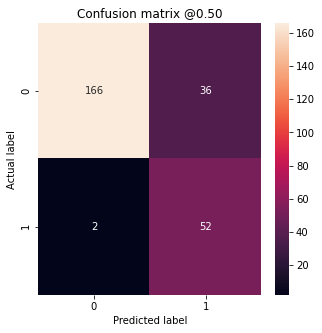

In [50]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(weighted_model.metrics_names, weighted_results):
#   print(name, ': ', value)
# print()

plot_cm(test_labels, test_predictions_weighted)
print(classification_report(test_labels, test_predictions_weighted>0.5))
print(roc_auc_score(test_labels, test_predictions_weighted>0.5))

In [36]:
weighted_model.save_weights('./best_weights/weighted1')

In [47]:
#import snapshot.SnapshotCallbackBuilder

M = 10 # number of snapshots
nb_epoch = T = 200 # number of epochs
alpha_zero = 0.0022 # initial learning rate
model_prefix = 'Model_'

snapshot = ecg_utility.snapshot.SnapshotCallbackBuilder(T, M, alpha_zero) 
# model = weighted_model
model = make_model() # Some model that has been compiled
# #model.load_weights(initial_weights)
model.load_weights('./best_weights/weighted1')

model.fit(train_features, train_labels, 
          epochs = 50,
          callbacks=snapshot.get_callbacks(model_prefix=model_prefix),
          validation_data=(val_features, val_labels), 
         )

Epoch 1/50
63/63 [==============================] - 1s 11ms/step - loss: 0.3178 - tp: 970.0000 - fn: 81.0000 - accuracy: 0.8770 - auc: 0.9295 - prc: 0.8867 - val_loss: 0.3089 - val_tp: 42.0000 - val_fn: 2.0000 - val_accuracy: 0.8780 - val_auc: 0.9351 - val_prc: 0.7708
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2834 - tp: 942.0000 - fn: 65.0000 - accuracy: 0.8947 - auc: 0.9389 - prc: 0.9112 - val_loss: 0.3074 - val_tp: 39.0000 - val_fn: 5.0000 - val_accuracy: 0.8732 - val_auc: 0.9317 - val_prc: 0.7600
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2589 - tp: 959.0000 - fn: 48.0000 - accuracy: 0.9067 - auc: 0.9481 - prc: 0.9281 - val_loss: 0.3169 - val_tp: 39.0000 - val_fn: 5.0000 - val_accuracy: 0.8927 - val_auc: 0.9383 - val_prc: 0.7764
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2385 - tp: 967.0000 - fn: 40.0000 - accuracy: 0.9191 - auc: 0.9519 - prc: 0.9272 - val_loss: 0.2527 - val_tp: 39.0000 - v

Epoch 18/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1539 - tp: 998.0000 - fn: 9.0000 - accuracy: 0.9513 - auc: 0.9761 - prc: 0.9659 - val_loss: 0.1644 - val_tp: 42.0000 - val_fn: 2.0000 - val_accuracy: 0.9415 - val_auc: 0.9717 - val_prc: 0.8824
Epoch 19/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1534 - tp: 997.0000 - fn: 10.0000 - accuracy: 0.9494 - auc: 0.9765 - prc: 0.9690 - val_loss: 0.1642 - val_tp: 41.0000 - val_fn: 3.0000 - val_accuracy: 0.9366 - val_auc: 0.9719 - val_prc: 0.8837
Epoch 20/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1528 - tp: 996.0000 - fn: 11.0000 - accuracy: 0.9503 - auc: 0.9763 - prc: 0.9672 - val_loss: 0.1642 - val_tp: 42.0000 - val_fn: 2.0000 - val_accuracy: 0.9415 - val_auc: 0.9718 - val_prc: 0.8833
Epoch 21/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1777 - tp: 985.0000 - fn: 22.0000 - accuracy: 0.9419 - auc: 0.9689 - prc: 0.9559 - val_loss: 0.1796 - val_tp: 42.0000 -

Epoch 35/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1425 - tp: 999.0000 - fn: 8.0000 - accuracy: 0.9553 - auc: 0.9771 - prc: 0.9710 - val_loss: 0.1342 - val_tp: 43.0000 - val_fn: 1.0000 - val_accuracy: 0.9512 - val_auc: 0.9790 - val_prc: 0.9156
Epoch 36/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1344 - tp: 1002.0000 - fn: 5.0000 - accuracy: 0.9578 - auc: 0.9802 - prc: 0.9754 - val_loss: 0.1260 - val_tp: 44.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9561 - val_auc: 0.9804 - val_prc: 0.9232
Epoch 37/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1372 - tp: 1004.0000 - fn: 3.0000 - accuracy: 0.9578 - auc: 0.9792 - prc: 0.9732 - val_loss: 0.1273 - val_tp: 44.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9561 - val_auc: 0.9808 - val_prc: 0.9249
Epoch 38/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1353 - tp: 1002.0000 - fn: 5.0000 - accuracy: 0.9583 - auc: 0.9796 - prc: 0.9738 - val_loss: 0.1332 - val_tp: 4

Bradycardia Detected (True Negatives):  184
Bradycardia Incorrectly Detected (False Positives):  18
False Alarm on detection (False Negatives):  0
Not Bradycardia detected (True Positives):  54
Total No Disease Diagnosis:  54
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       202
           1       0.75      1.00      0.86        54

    accuracy                           0.93       256
   macro avg       0.88      0.96      0.91       256
weighted avg       0.95      0.93      0.93       256

0.9554455445544555


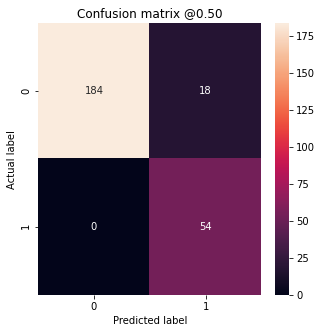

In [48]:
#results_snap = model.evaluate(test_features, test_labels,batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(weighted_model.metrics_names, weighted_results):
#   print(name, ': ', value)
# print()

results_snap = model.predict(test_features, batch_size = BATCH_SIZE)

plot_cm(test_labels, results_snap)
print(classification_report(test_labels, results_snap>0.5))
print(roc_auc_score(test_labels, results_snap>0.5))

In [49]:
# model.save_weights('./best_weights/check1')
# model.save_weights('./best_weights/check2')

In [45]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return